# 1. アルゴリズムの評価　混同行列


### 実行前処理

In [ ]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [ ]:
# seabornとは、Pythonのデータ可視化ライブラリで、同じPythonの可視化ライブラリであるmatplotlibが内部で動いています
!pip install seaborn

In [ ]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)
# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# 乱数の種
random_seed = 123


## 利用するデータセット
腫瘍のデータから乳がんの陽性・陰性を分類する


In [ ]:
# データ読み込みからデータ分割まで

# ライブラリのimport
from sklearn.datasets import load_breast_cancer

# データのロード()()
cancer = load_breast_cancer()

# breast_cancerデータ確認 件数、項目など  を確認する
cancer.DESCR

# データフレームへの取り込み
columns = [
    '半径_平均', 'きめ_平均', '周長_平均', '面積_平均', 
    '平滑度_平均','コンパクト度_平均', '凹面_平均',
    '凹点_平均', '対称性_平均', 'フラクタル度_平均',
    '半径_標準誤差', 'きめ_標準誤差', '周長_標準誤差',
    '面積_標準誤差', '平滑度_標準誤差',
    'コンパクト度_標準誤差', '凹面_標準誤差', '凹点_標準誤差',
    '対称性_標準誤差', 'フラクタル度_標準誤差',
    '半径_最大', 'きめ_最大', '周長_最大', '面積_最大', 
    '平滑度_最大','コンパクト度_最大', '凹面_最大', '凹点_最大', 
    '対称性_最大', 'フラクタル度_最大'
]

# ロードしたデータのデータフレームへの取り込み
df = pd.DataFrame(cancer.data, columns=columns)
df.describe()

In [ ]:
# 入力データ x
x = cancer.data

# 正解データ y
# 良性: 0 悪性: 1に値を変更する
y = 1- cancer.target

# 入力データを2次元に絞り込み
x2 = x[:,:2]

# (4) データ分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

In [ ]:
# アルゴリズム選定から評価まで

# アルゴリズム選定 (ロジスティック回帰)
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

# 学習
algorithm.fit(x_train, y_train)

# 予測
y_pred = algorithm.predict(x_test)

# 評価
score = algorithm.score(x_test, y_test)

# 結果確認
print(f'score: {score:.4f}')

## 1.1 混同行列
予測結果と正解データを値別に比較した表のこと

confusion_matrix関数を使うと、2値クラス分類のみならず多クラス分類でも混同行列を作成できる

In [ ]:
# 混同行列の計算

# 必要ライブラリの取込み
from sklearn.metrics import confusion_matrix

# 混同行列の生成
#   y_test: 検証データの正解データ
#   y_pred: 検証データの予測結果
matrix = confusion_matrix(y_test, y_pred)

# 結果確認
print(matrix)

[[101   2]
 [ 19  49]]


In [ ]:
# 混同行列表示用関数

def make_cm(matrix, columns):
    # matrix numpy配列
    
    # columns 項目名リスト
    n = len(columns)
    
    # '正解データ'をn回繰り返すリスト生成
    act = ['正解データ'] * n
    pred = ['予測結果'] * n
    
    #データフレーム生成
    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

In [ ]:
# make_cmを使った混同行列標示
cm = make_cm(matrix, ['良性', '悪性'])
display(cm)

予測結果    
           良性  悪性
正解データ 良性  101   2
      悪性   19  49

# 2. アルゴリズムの評価　精度・適合率・再現率・F値

 適合率・再現率・F値
precision_recall_fscore_support関数を使うと、2値クラス分類のみならず多クラス分類でも適合率・再現率・F値を計算できる

In [ ]:
# 適合率・再現率・F値の計算
# ライブラリの取込み
from sklearn.metrics import precision_recall_fscore_support

# 適合率・再現率・F値の計算は　precision_recall_fscore_support　で計算できる
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_test, y_pred, average='binary')


## 2.1 精度(Accuarcy)
どれだけ予測が正確なのかを表す
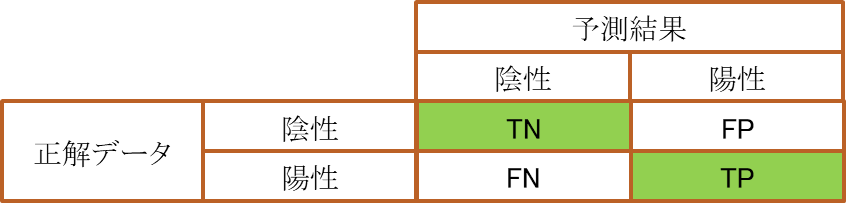

精度 = 正解数/全件

In [ ]:
display(cm)
total = matrix[0].sum() + matrix[1].sum()
accuracy = matrix[0,0] + matrix[1,1]
print(f'正解:{accuracy:1}')
accuracy = ( accuracy / total ) * 100
print(f'合計:{total:1}')
print(f'精度: {accuracy:.4f}')

## 2.2 適合率(Precision)

モデルが陽性と予測して、本当に陽性だった割合\
陽性の結果が目的に直接影響する場合はこの値で評価


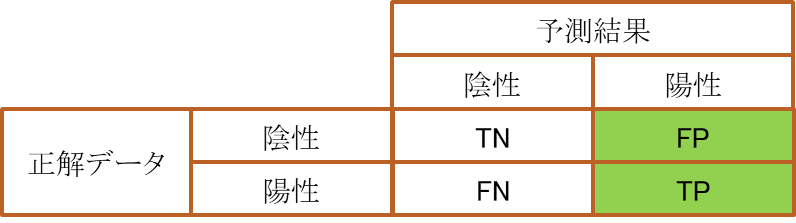

適合率 = TP/(TP+FP)


In [ ]:
# 結果の確認
display(cm)
tp = matrix[1,1]
print(f'TP:{tp:1}')
tpfp =  matrix[0,1] +  matrix[1,1]
print(f'TP+FP:{tpfp:1}')
print(f'適合率: {precision:.4f}')

## 2.3 再現率(Recall)

本当に陽性だったデータのうち、どの程度をモデルで陽性と検知できた割合\
問題のある事象を見つけたい場合はこの値で評価

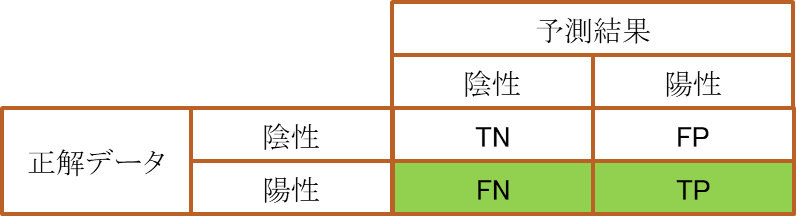

再現率 = TP/(FN+TP)


In [ ]:
# 結果の確認
display(cm)
tp = matrix[1,1]
print(f'TP:{tp:1}')
tpfn = matrix[1].sum()
print(f'TP+FN:{tpfn:1}')
print(f'再現率: {recall:.4f}')

## 2.4 F値(F-score)

この値を最大とするモデルが、適合率と再現率を両方バランスよく最適化されていることを示す\
予測結果の陽性が目的に対し重要なので精度を使って評価したくないが、適合率と再現率両方をバランスよく評価したい場合に使用

F値　=　(2∗(適合率)∗(再現率))/((適合率)+(再現率))

In [ ]:
# 結果の確認
display(cm)

print(f'適合率: {precision:.4f}')
print(f'再現率: {recall:.4f}')

print(f'F値:   {fscore:.4f}')

# 3. アルゴリズムの評価　確率値と閾値

分類モデルは確率で結果を予測している\
2値分類の場合は0.5を閾値として陰性、陽性を判定している

## 3.1 確率値

In [ ]:
# 予測を確率値で取得するために、predict_proba　使用する
y_proba = algorithm.predict_proba(x_test)
# 一部のデータを取得して確認する
print(y_proba[10:20,:])

In [ ]:
# positive(1)の確率値の取得
y_proba1 = y_proba[:,1]

# 結果確認
# 一部のデータの分類結果と確率を表示する
print(y_pred[10:20])
print(y_proba1[10:20])

この例は0.6ぐらいが閾値なのかもしれません。

## 3.2 閾値
閾値を調整することにより、適合率と再現率を調整できる

偽陽性を減らしたい場合の閾値の調整\
((陽性と判定されたが実は陰性だった)


閾値を調整しない場合

In [ ]:
# 閾値を変更した場合の予測関数の定義
def pred(algorithm, x, thres):
    # 確率値の取得(行列)
    y_proba = algorithm.predict_proba(x)
    
    # 予測結果1の確率値
    y_proba1 =  y_proba[:,1]
    
    # 予測結果1の確率値 > 閾値
    y_pred = (y_proba1 > thres).astype(int)
    return y_pred

In [ ]:
# 閾値0.5で予測結果取得
pred_05 = pred(algorithm, x_test, 0.5)

# 結果確認
print(pred_05[10:20])

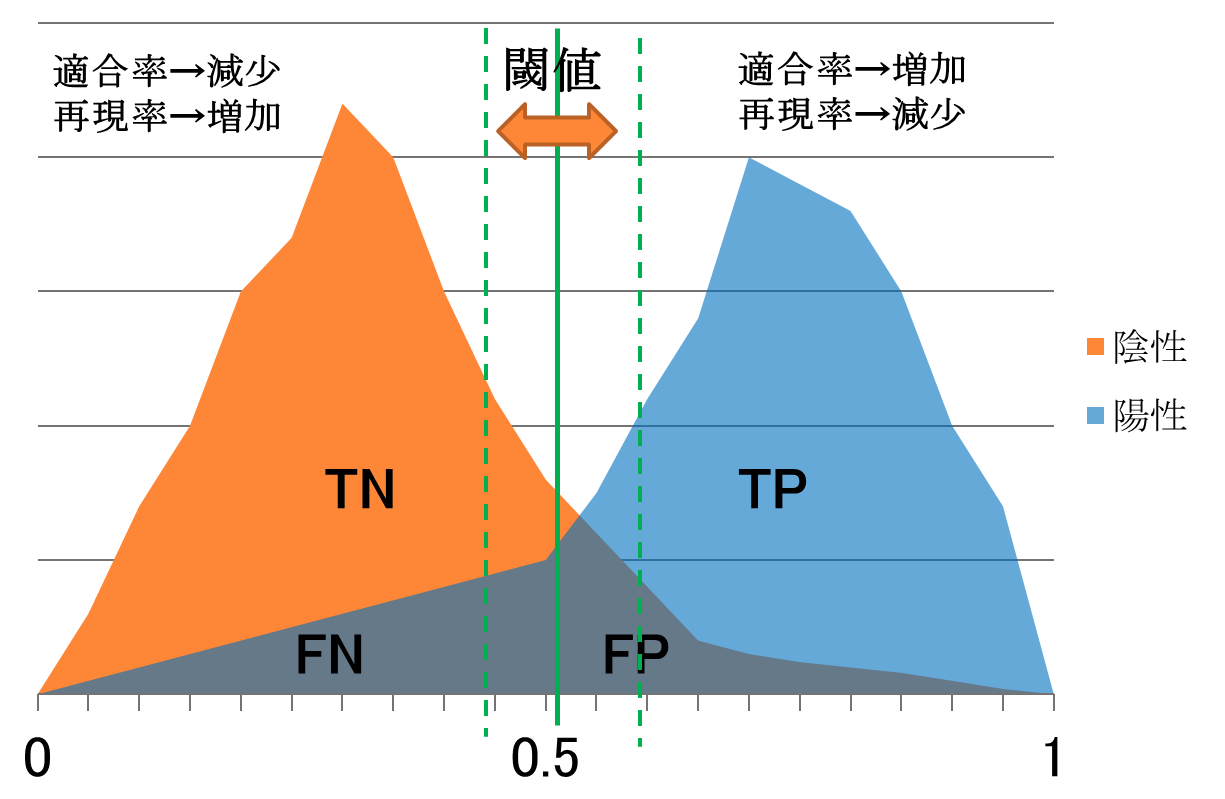

In [ ]:
# 閾値0.7で予測結果取得
pred_07 = pred(algorithm, x_test, 0.7)

# 結果確認
print(pred_07[10:20])

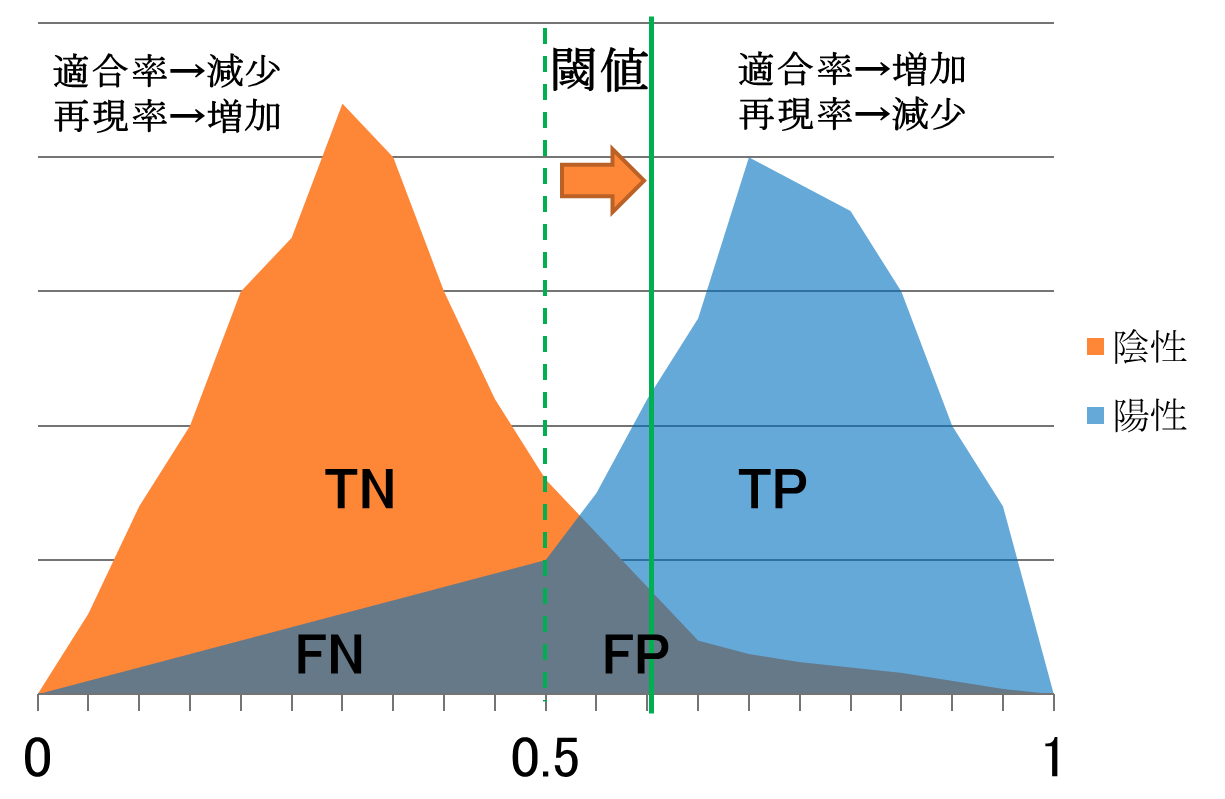

In [ ]:
# 結果確認
print(pred_05[10:20])
# 結果確認
print(pred_07[10:20])